# Contributing Factors Analysis

## README

### Overview
This notebook explores key spatial datasets related to human activities and infrastructure that may contribute to or correlate with nitrogen dioxide (NO₂) pollution in two case study cities: Addis Ababa, Ethiopia and Baghdad, Iraq. Including:

   - **Point of Interest and Road Network Data**, from Open Street Map for [Ethiopia](https://download.geofabrik.de/africa/ethiopia-latest-free.shp.zip) and [Iraq](https://download.geofabrik.de/asia/iraq-latest-free.shp.zip).
   - **Population Data**: [WorldPop](https://data.humdata.org/search?q=Spatial+Distribution+of+Population+&ext_search_source=main-nav) for population density.
   - **Night Time Light Data**, from [NASA Black Marble](https://blackmarble.gsfc.nasa.gov) for night time light.
   - **Cloud Cover Data**, from [MODIS/Aqua Surface Reflectance](https://lpdaac.usgs.gov/products/myd09a1v061/) for cloud cover.
   - **Land Surface Temperature Data**, from [MODIS/Terra Land Surface Temperature](https://lpdaac.usgs.gov/products/mod11a1v061/) for land surface temperature.
   - **Traffic Congestion Data**, from WorldBank internal source, **only available in Baghdad**.

   - Auxiliary dataset: **Boundary data**, from [HDX](https://data.humdata.org/) for [Ethiopia](https://data.humdata.org/dataset/cod-ab-eth) and [Iraq](https://data.humdata.org/dataset/cod-ab-irq).


### Objective
The main objective of this notebook is to:

- Finish the data processing of different datasets, including missing data filling, clipping to interested area, aggregation and basic visualization.

- Provide mesh-based visualizations of urban-scale features such as population density, road length, and POI distribution, to support future modeling

### Workflow

1. **Data Acquisition**
   - Downloads datasets from multiple sources listed above.

2. **Data Processing**
   - Clips all spatial layers to city-level boundaries. 
   - Aggregates various indicators into uniform mesh grids for spatial comparison.

3. **Visualisation**
   - Generates static maps of population density and road infrastructure distribution.
   - Visualises spatial variation in contributing factors to support exploratory analysis.

4. **Export Results**
   - Save enriched mesh grids with new attributes for modeling and further analysis.

### Outputs

- **Processed GeoPackages**: City-level road, POI, and infrastructure layers.
- **Mesh-Based Aggregated Tables**: Feature counts and densities per grid cell.
- **Static Visualisations**: Color maps for all contributing factors to aid spatial interpretation.
- **Harmonised Datasets**: All outputs aligned spatially and ready for merging with NO₂ concentration data.



## Init: Prepare Packages and Configuration

Get current file/repo/data path in local to make sure the following cells run properly.

In [ ]:
# -----------------------------------------------------------------------------
# STANDARD PATH INITIALISATION (borrowed from Notebook 1)
# -----------------------------------------------------------------------------
# %pip install rasterstats

from pathlib import Path
import sys
import geopandas as gpd

CURR_PATH = Path().resolve()            # current file path
REPO_PATH = CURR_PATH.parent            # current repository path
DATA_PATH = REPO_PATH / "data"          # path for saving the data
DEMO_PATH = DATA_PATH / "demo-data"     # path for demo purpose 

SRC_PATH = REPO_PATH / "src"    # path for other sources
sys.path.append(str(SRC_PATH))  # add src to system path to import custom functions

# -----------------------------------------------------------------------------
# IMPORT OSM‐ENRICHMENT AND VISUALISATION HELPERS
# -----------------------------------------------------------------------------
from osmstats import batch_write
from visualization import plot_mesh_static
from visualization import plot_mesh

# Import customised scripts
from aggregation import*
from missingvalue import*
from visualization import*
from osmstats import*
from helpercollections import*

## 0 Methodology of Data Process Pipeline

This chapter processes the contributing factors through the following steps:

- **(1) Filling Missing Value**: Spot the missing values in raster and replenish them using iterative checking, using **mean** of the neighbour raster as the replenish value.

- **(2) Clipping to Region**: Clipping the data to the interested area, and output the filled raster.

- **(3) Aggregation**: Import the generated mesh and aggregate the raster to the mesh level.

- **(4) Visualization**: Visualize the result as static figure [*.png*] or dynamic figure [*.gif*].

## 1 OSM Data

This chapter is used to enrich spatial mesh grids with OpenStreetMap (OSM) data and visualise selected indicators such as POI density, road length, and land-use area.

Note:

* A predefined set of eight POI types (e.g., supermarket, hospital) and six land-use classes (e.g., industrial, residential) are used to filter relevant OSM content.

* OSM enrichment is performed at the mesh level using a batch processing pipeline, resulting in hundreds of `.gpkg` files for each day.

* Static maps are generated to visualise aggregated metrics such as POI share, road length, and industrial land area in square metres.

* These outputs provide spatial insight into the built environment and urban function of regions like Addis Ababa.


#### Ethiopia - Addis Ababa

Define static OSM parameters

In [ ]:
# Eight relevant POIs
relevant_poi = [
    "supermarket",
    "hospital",
    "car_dealership",
    "car_rental",
    "car_wash",
    "marketplace",
    "mall",
    "university"
]

# Land‐use categories of interest
landuse_classes = [
    "industrial",
    "commercial",
    "residential",
    "retail",
    "farmland",
    "farmyard"
]

Paths for Addis Ababa

In [ ]:
addis_mesh_in  = DATA_PATH / "addis-empty-mesh-data"
addis_mesh_out = DATA_PATH / "addis-OSM-mesh-data"
addis_osm      = DATA_PATH / "OSM" / "ethiopia-latest-free.shp"
ethiopia_pp_path = DATA_PATH / "Power Plants" / "ethiopia_power_fossil.gpkg"

Enrich Addis Ababa — writes ~730 files to addis-OSM-mesh-data

In [ ]:
batch_write(
    city="addis",
    mesh_folder_in=addis_mesh_in,
    mesh_folder_out=addis_mesh_out,
    osm_shapefile=addis_osm,
    relevant_poi=relevant_poi,
    landuse_classes=landuse_classes,
    fossil_pp_path=ethiopia_pp_path
)

Cell “Plot the 2023-01-01 Demo Mesh for QA”

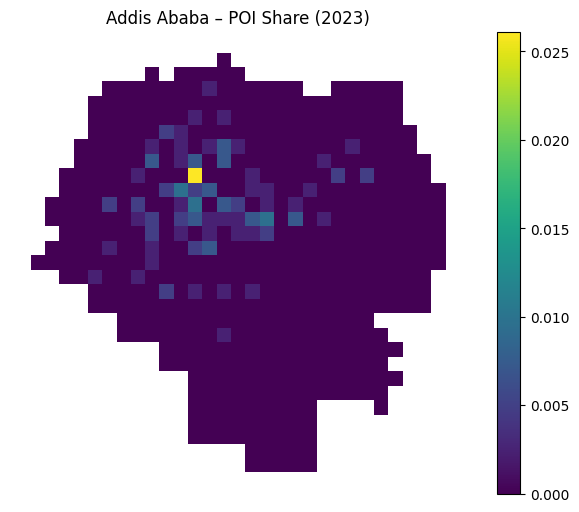

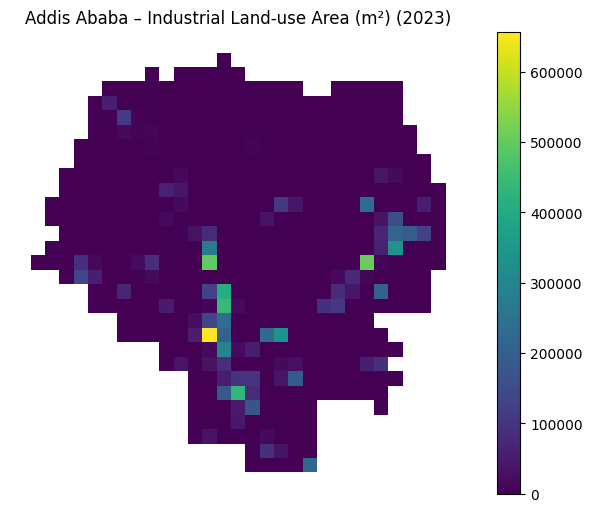

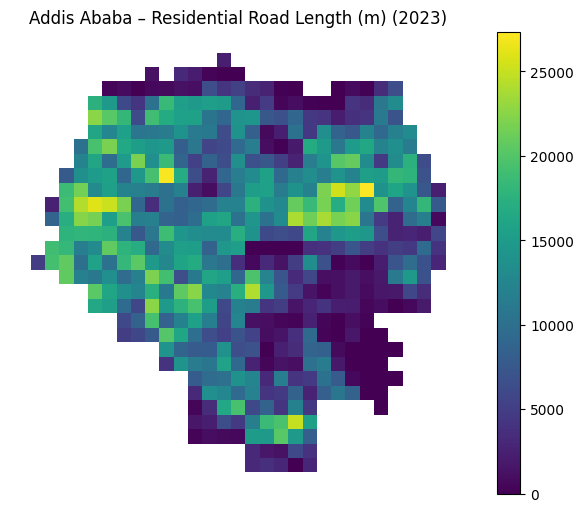

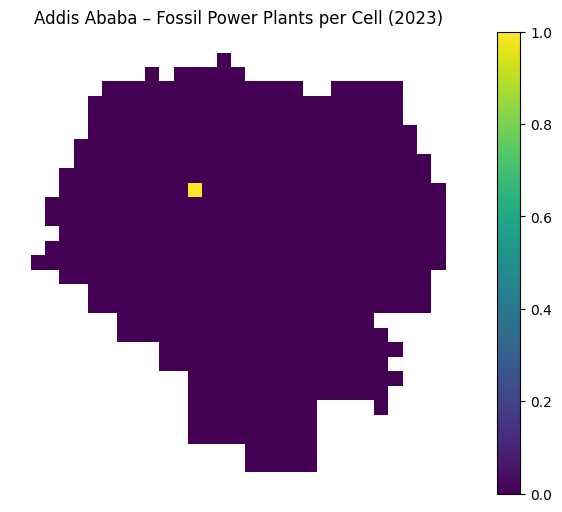

<Axes: title={'center': 'Addis Ababa – Fossil Power Plants per Cell (2023)'}>

In [ ]:
demo_dir = DATA_PATH / "demo-data"
#  → “addis-2023-01-01.gpkg” and “baghdad-2023-01-01.gpkg” now exist

# ─── Load the single Addis mesh for QA ────────────────────────────────────────
gdf_addis = gpd.read_file(demo_dir / "addis-ababa-2023-01-01.gpkg")

# POI Share
plot_mesh(
    mesh    = gdf_addis,
    feature = "poi_share",
    title   = "Addis Ababa – POI Share (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

# Industrial Land‐use Area
plot_mesh(
    mesh    = gdf_addis,
    feature = "lu_industrial_area",
    title   = "Addis Ababa – Industrial Land‐use Area (m²) (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

# ─── NEW: Residential Road Length ───────────────────────────────────────────
plot_mesh(
    mesh    = gdf_addis,
    feature = "road_residential_len",
    title   = "Addis Ababa – Residential Road Length (m) (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

# ─── NEW: # of Fossil Power Plants per Cell ─────────────────────────────────
plot_mesh(
    mesh    = gdf_addis,
    feature = "fossil_pp_count",
    title   = "Addis Ababa – Fossil Power Plants per Cell (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

#### Iraq - Baghdad

Paths for Baghdad

In [ ]:
# -----------------------------------------------------------------------------
# PATHS FOR BAGHDAD
# -----------------------------------------------------------------------------
baghdad_mesh_in  = DATA_PATH / "baghdad-empty-mesh-data"
baghdad_mesh_out = DATA_PATH / "baghdad-OSM-mesh-data"
baghdad_osm      = DATA_PATH / "OSM" / "iraq-latest-free.shp"
iraq_pp_path     = DATA_PATH / "Power Plants" / "iraq_power_fossil.gpkg"

Enrich Baghdad — writes ~730 files to baghdad-OSM-mesh-data

In [ ]:
batch_write(
    city="baghdad",
    mesh_folder_in=baghdad_mesh_in,
    mesh_folder_out=baghdad_mesh_out,
    osm_shapefile=baghdad_osm,
    relevant_poi=relevant_poi,
    landuse_classes=landuse_classes,
    fossil_pp_path=iraq_pp_path
)

Plot demo mesh for 2023 (already written in `data/demo-data`)

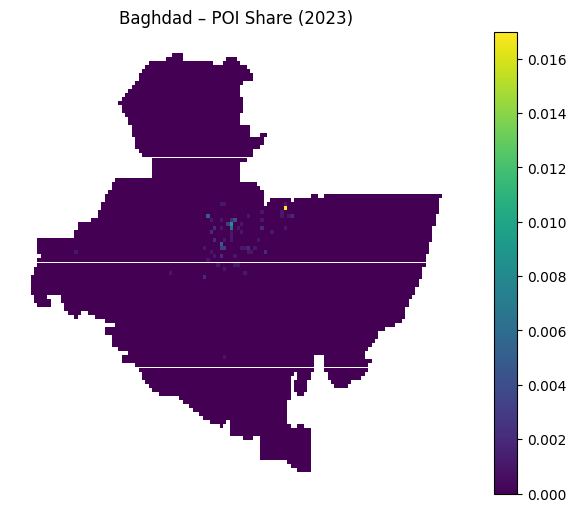

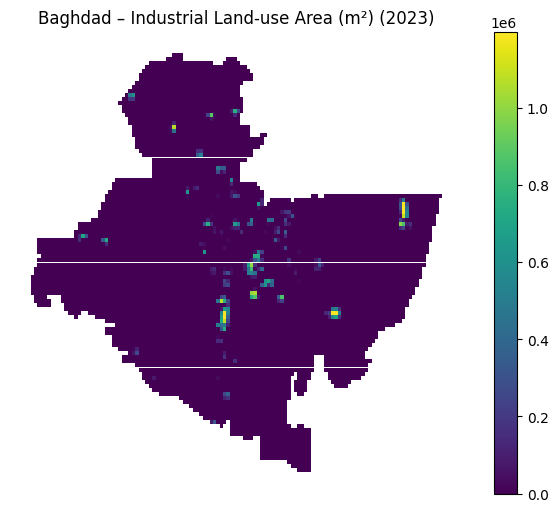

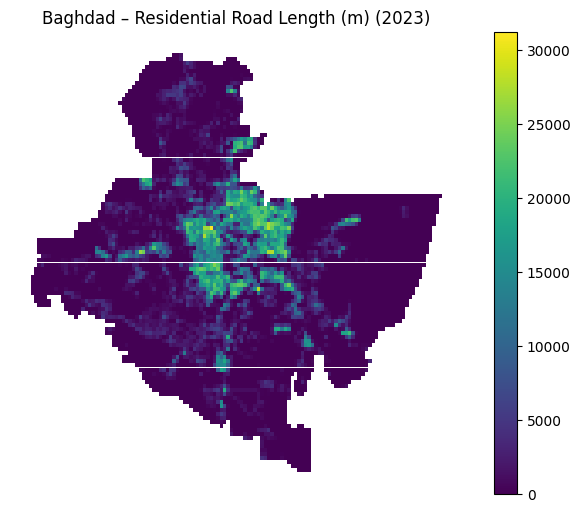

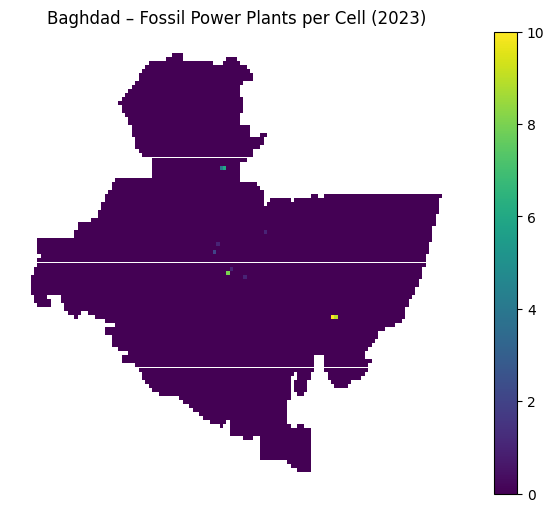

<Axes: title={'center': 'Baghdad – Fossil Power Plants per Cell (2023)'}>

In [ ]:
# ─── Load the single Baghdad mesh ────────────────────────────────────────────
gdf_bag = gpd.read_file(demo_dir / "baghdad-2023-01-01.gpkg")

# POI Share
plot_mesh(
    mesh    = gdf_bag,
    feature = "poi_share",
    title   = "Baghdad – POI Share (2023)",
    figsize = (8, 6),
    show    = True, 
    cmap    = "viridis",
    show_edges=False
)

# Industrial Land‐use Area
plot_mesh(
    mesh    = gdf_bag,
    feature = "lu_industrial_area",
    title   = "Baghdad – Industrial Land‐use Area (m²) (2023)",
    figsize = (8, 6),
    show    = True, 
    cmap    = "viridis",
    show_edges=False
)

# ─── NEW: Residential Road Length ───────────────────────────────────────────
plot_mesh(
    mesh    = gdf_bag,
    feature = "road_residential_len",
    title   = "Baghdad – Residential Road Length (m) (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

# ─── NEW: # of Fossil Power Plants per Cell ─────────────────────────────────
plot_mesh(
    mesh    = gdf_bag,
    feature = "fossil_pp_count",
    title   = "Baghdad – Fossil Power Plants per Cell (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)


## 2 Population Data

This chapter is used to aggregate and visualise population distribution in different regions using mesh grids.

Note:

* The population data is aggregated based on predefined hexagonal or square mesh grids using zonal statistics.

* Yearly aggregated population values are stored as `.gpkg` files, with one file for each day to support temporal analysis.

* Static maps are generated to visualise the spatial distribution of population across the mesh in each year.

* The workflow supports comparison across multiple years (e.g., 2023 and 2024), enabling temporal change analysis.

In [ ]:
# ------------------------------------------------------------------------------
# INITIALISE MESH PATHS AND READ GPKG LAYERS
# ------------------------------------------------------------------------------
import fiona

addis_meshes_path = DATA_PATH / 'addis-mesh-data'       # path to folder storing Addis mesh files
baghdad_meshes_path = DATA_PATH / 'baghdad-mesh-data'   # path to folder storing Baghdad mesh files

mesh_addis = DATA_PATH / "mesh-grid" / "grid_addis_ababa.gpkg"     # full path to Addis Ababa mesh grid file
mesh_baghdad = DATA_PATH / "mesh-grid" / "grid_baghdad.gpkg"       # full path to Baghdad mesh grid file

lyr_addis_name = fiona.listlayers(mesh_addis)[0]        # extract the only layer name in the Addis GPKG
lyr_baghdad_name = fiona.listlayers(mesh_baghdad)[0]    # extract the only layer name in the Baghdad GPKG

#### Ethiopia - Addis Ababa

In [ ]:
output_root = DATA_PATH / "eth-pop-gpkg"          # path for saving the data
eth_pop_path = DATA_PATH / 'eth-pop'

aggregate_pop_data(
    data_tiff_path=eth_pop_path,
    mesh_path=mesh_addis,
    layer_name=lyr_addis_name,
    agg_type="sum",
    feature_col="pop_sum_m",
    output_path=output_root
)

Currently working on: 1/2, Year: 2023
Saved: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\eth-pop-gpkg\pop_aggregated_2023.gpkg
Currently working on: 2/2, Year: 2024
Saved: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\eth-pop-gpkg\pop_aggregated_2024.gpkg


In [ ]:
# Filter for .gpkg files that contain "2023" in the filename
gpkg_files_2023_eth = [f for f in addis_meshes_path.glob("*.gpkg") if "2023" in f.name]
print(f"There are {len(gpkg_files_2023_eth)} files from the year 2023.")

# Filter for .gpkg files that contain "2023" in the filename
gpkg_files_2024_eth = [f for f in addis_meshes_path.glob("*.gpkg") if "2024" in f.name]
print(f"There are {len(gpkg_files_2024_eth)} files from the year 2024.")

There are 365 files from the year 2023.
There are 366 files from the year 2024.


In [ ]:
# Input file paths
src_2023_eth = DATA_PATH / "eth-pop-gpkg" / "pop_aggregated_2023.gpkg"
src_2024_eth = DATA_PATH / "eth-pop-gpkg" / "pop_aggregated_2024.gpkg"

# Output directory 
output_path = DATA_PATH

# Run for 2023 and 2024
generate_daily_files(src_2023_eth, 2023, 365, "addis-ababa", output_path)
generate_daily_files(src_2024_eth, 2024, 366, "addis-ababa", output_path)

Done: 365 files created for 2023.
Done: 366 files created for 2024.


**Visualisation**

Show aggregated result in 2023 and 2024 for Addis Ababa.

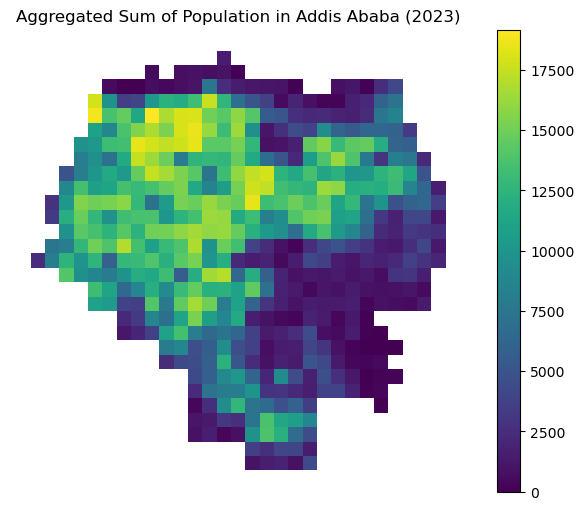

In [ ]:

pop_2023_eth = gpd.read_file(DATA_PATH / "pop-files-addis-ababa" / "addis-ababa-2023-02-21.gpkg")
plot_mesh(mesh=pop_2023_eth, feature="pop_sum_m", title="Aggregated Sum of Population in Addis Ababa (2023)", show_edges=False)
plt.show()

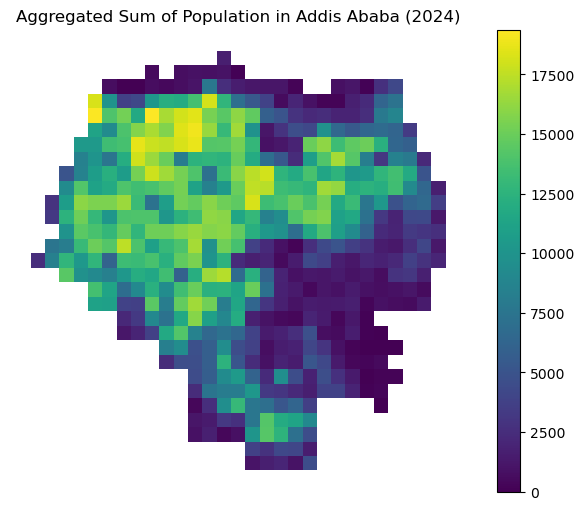

In [ ]:
pop_2024_eth = gpd.read_file(DATA_PATH / "pop-files-addis-ababa" / "addis-ababa-2024-02-21.gpkg")
plot_mesh(mesh=pop_2024_eth, feature="pop_sum_m", title="Aggregated Sum of Population in Addis Ababa (2024)", show_edges=False)
plt.show()

#### Iraq - Baghdad

In [ ]:
output_root = DATA_PATH / "iraq-pop-gpkg"          # path for saving the data
iraq_pop_path = DATA_PATH / 'iraq-pop'

aggregate_pop_data(
    data_tiff_path=iraq_pop_path,
    mesh_path=mesh_baghdad,
    layer_name=lyr_baghdad_name,
    agg_type="sum",
    feature_col="pop_sum_m",
    output_path=output_root
)

Currently working on: 1/2, Year: 2023
Saved: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\iraq-pop-gpkg\pop_aggregated_2023.gpkg
Currently working on: 2/2, Year: 2024
Saved: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\iraq-pop-gpkg\pop_aggregated_2024.gpkg


In [ ]:
# Filter for .gpkg files that contain "2023" in the filename
gpkg_files_2023_iraq = [f for f in baghdad_meshes_path.glob("*.gpkg") if "2023" in f.name]
print(f"There are {len(gpkg_files_2023_iraq)} files from the year 2023.")

# Filter for .gpkg files that contain "2023" in the filename
gpkg_files_2024_iraq = [f for f in baghdad_meshes_path.glob("*.gpkg") if "2024" in f.name]
print(f"There are {len(gpkg_files_2024_iraq)} files from the year 2024.")

There are 365 files from the year 2023.
There are 366 files from the year 2024.


In [ ]:
# Input file paths
src_2023_iraq = DATA_PATH / "iraq-pop-gpkg" / "pop_aggregated_2023.gpkg"
src_2024_iraq = DATA_PATH / "iraq-pop-gpkg" / "pop_aggregated_2024.gpkg"

# Output directory 
output_path = DATA_PATH 

# Run for 2023 and 2024
generate_daily_files(src_2023_iraq, 2023, 365, "baghdad", output_path)
generate_daily_files(src_2024_iraq, 2024, 366, "baghdad", output_path)

Done: 365 files created for 2023.
Done: 366 files created for 2024.


**Visualisation**

Show aggregated result in 2023 and 2024 for Baghdad.

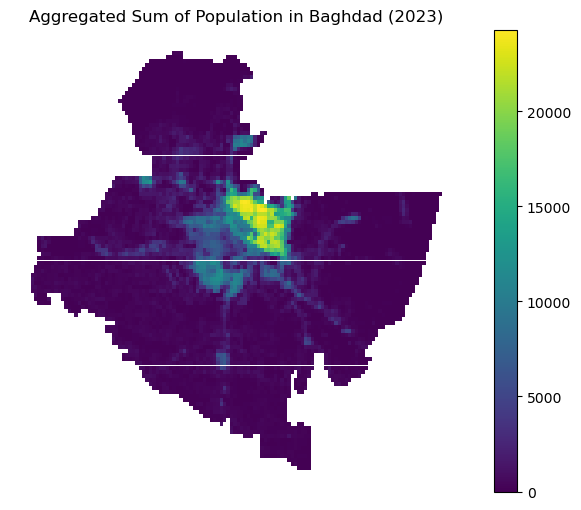

In [ ]:
pop_2023_iraq = gpd.read_file(DATA_PATH / "pop-files-baghdad" / "baghdad-2023-02-21.gpkg")
plot_mesh(mesh=pop_2023_iraq, feature="pop_sum_m", title="Aggregated Sum of Population in Baghdad (2023)", show_edges=False)
plt.show()

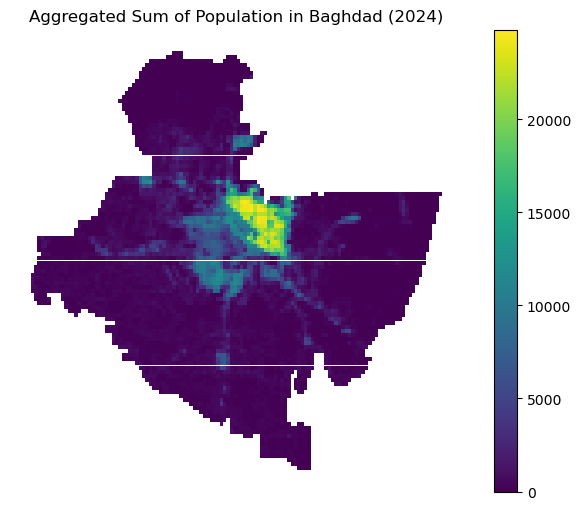

In [ ]:
pop_2024_iraq = gpd.read_file(DATA_PATH / "pop-files-baghdad" / "baghdad-2024-02-21.gpkg")
plot_mesh(mesh=pop_2024_iraq, feature="pop_sum_m", title="Aggregated Sum of Population in Baghdad (2024)", show_edges=False)
plt.show()

## 3 Night Time Light

In [2]:
import rasterio
from aggregation import*
import fiona

output_path = DATA_PATH
addis_meshes_path = DATA_PATH / 'addis-mesh-data'
baghdad_meshes_path = DATA_PATH / 'baghdad-mesh-data'

mesh_addis = DATA_PATH / "mesh-grid" / "grid_addis_ababa.gpkg"
mesh_baghdad = DATA_PATH / "mesh-grid" / "grid_baghdad.gpkg"

lyr_addis_name = fiona.listlayers(mesh_addis)[0]         # control layer number = 1 
lyr_baghdad_name = fiona.listlayers(mesh_baghdad)[0]

#### Ethiopia - Addis Ababa

Clip the raster to interested area.

In [ ]:
min_lon, max_lon = 38.65, 39.05
min_lat, max_lat = 8.8, 9.1

addis_ntl_tiff = DATA_PATH / "addis-ababa-NTL-tiffs"
clip_tiff_by_bbox('addis-ababa', addis_ntl_tiff, output_path,
                      min_lon, min_lat, max_lon, max_lat,)

Fill the missing data in the raster.

In [ ]:
addis_ntl_clipped = DATA_PATH / "addis-ababa-NTL-clipped"

fill_ntl_missing_data(
    city = 'addis-ababa',
    data_tiff_path = addis_ntl_clipped,
    output_path = DATA_PATH,
)

Generate TIFF Animation

Scanning percentiles: 100%|██████████| 731/731 [00:06<00:00, 110.52it/s]


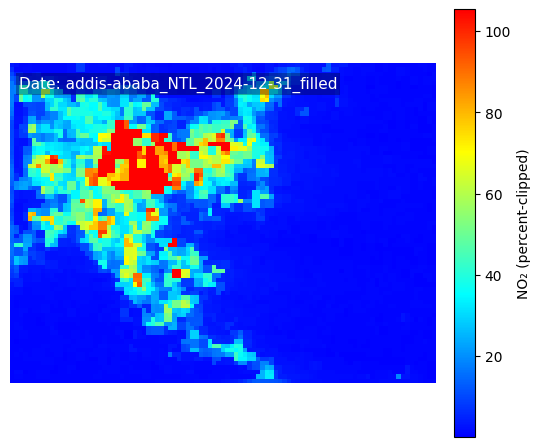

Animation saved to: D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\animation-output\addis-ababa-NTL-animation.gif


In [ ]:
addis_ntl_tif_dir = DATA_PATH / 'addis-ababa-NTL-filled'  
tiff_2_gif(addis_ntl_tif_dir, output_path=DATA_PATH, output_name="addis-ababa-NTL-animation", fps = 8)

Aggregate to Mesh

In [ ]:
# Aggregate Ethiopia - Addis Ababa
addis_ntl_tif_dir = DATA_PATH / 'baghdad-NTL-filled'  
aggregate_data(
    data_tiff_path=addis_ntl_tif_dir, 
    mesh_path=baghdad_meshes_path, 
    layer_name=lyr_baghdad_name,
    feature_name="NTL_mean"
    )

#### Iraq - Baghdad

Clip the raster to interested area.

In [ ]:
min_lon, max_lon = 43.7, 45.0
min_lat, max_lat = 32.7, 33.8

baghdad_ntl_tiff = DATA_PATH / "baghdad-NTL-tiffs"
clip_tiff_by_bbox('baghdad', baghdad_ntl_tiff, output_path,
                      min_lon, min_lat, max_lon, max_lat,)

Fill the missing data in the raster.

In [ ]:
baghdad_ntl_clipped = DATA_PATH / "baghdad-NTL-clipped"

fill_ntl_missing_data(
    city = 'baghdad',
    data_tiff_path = baghdad_ntl_clipped,
    output_path = DATA_PATH,
)

Generate TIFF Animation

Scanning percentiles: 100%|██████████| 701/701 [00:07<00:00, 88.71it/s]


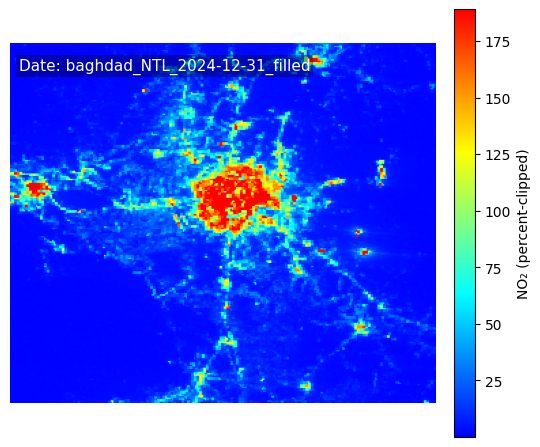

Animation saved to: D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\animation-output\baghdad-NTL-animation.gif


In [ ]:
baghdad_ntl_tif_dir = DATA_PATH / 'baghdad-NTL-filled'  
tiff_2_gif(baghdad_ntl_tif_dir, output_path=DATA_PATH, output_name="baghdad-NTL-animation", fps = 8)

Aggregate to Mesh

In [ ]:
# Aggregate Ethiopia - Addis Ababa
baghdad_ntl_tif_dir = DATA_PATH / 'baghdad-NTL-filled'  
aggregate_data(
    data_tiff_path=baghdad_ntl_tif_dir, 
    mesh_path=baghdad_meshes_path, 
    layer_name=lyr_baghdad_name,
    feature_name="NTL_mean"
    )

## 4 Cloud Cover

#### Ethiopia - Addis Ababa

In [ ]:
output_path = DATA_PATH
addis_meshes_path = DATA_PATH / 'addis-mesh-data'
baghdad_meshes_path = DATA_PATH / 'baghdad-mesh-data'

mesh_addis = DATA_PATH / "mesh-grid" / "grid_addis_ababa.gpkg"
mesh_baghdad = DATA_PATH / "mesh-grid" / "grid_baghdad.gpkg"

lyr_addis_name = fiona.listlayers(mesh_addis)[0]         # control layer number = 1 
lyr_baghdad_name = fiona.listlayers(mesh_baghdad)[0]

Clip

In [ ]:
min_lon, max_lon = 38.65, 39.05
min_lat, max_lat = 8.8, 9.1

In [ ]:
addis_cloud_tiff = data_folder = "../data/Cloud_AddisAbaba" 
clip_cloud_tiff_by_bbox('addis-ababa', addis_cloud_tiff, output_path,
                      min_lon, min_lat, max_lon, max_lat,)

Fill cloud missing data

**Cloud-category gaps.**
Cloud type is a label—clear, partly cloudy, overcast—not a number, so averaging would be meaningless. Instead, we look at the surrounding week (three days on either side) and see which label appears most often. That majority label becomes the stand-in for any missing pixel. This “popular vote” preserves the discrete nature of the data and mirrors how meteorologists summarise weekly sky conditions.

In [ ]:
addis_cloud_clipped = DATA_PATH / "addis-ababa-cloud-clipped"

fill_cloud_missing_data(
    city = 'addis-ababa',
    data_tiff_path = addis_cloud_clipped,
    output_path = DATA_PATH,
)

Visualisation

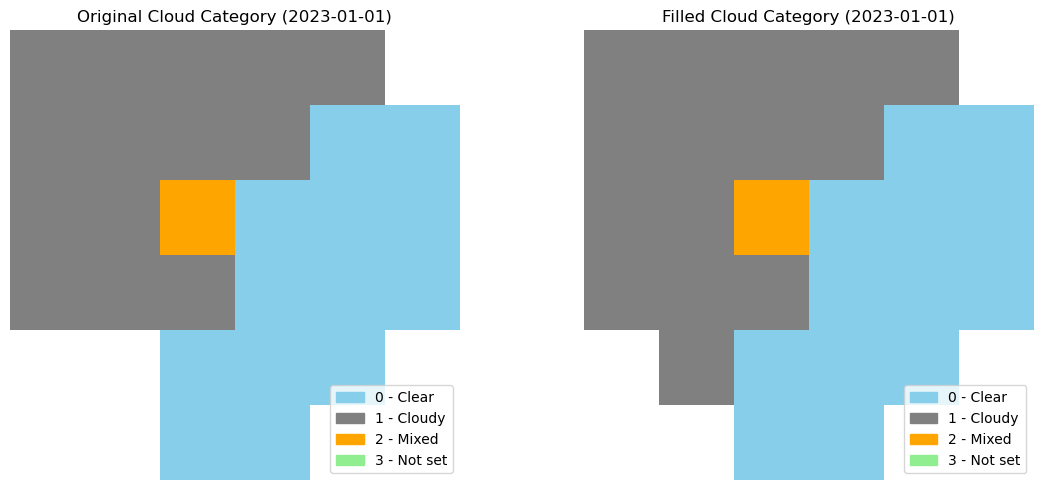

In [ ]:
import matplotlib.pyplot as plt
import rasterio

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original cloud category raster

with rasterio.open(DATA_PATH / 'addis-ababa-cloud-clipped/CloudState_Addis-Ababa_20230101.tif') as src1:
    cloud_arr1 = src1.read(1)
    nodata = src1.nodata  # Get nodata value from the raster metadata
    plot_cloud_category_raster(
        arr=cloud_arr1,
        title="Original Cloud Category (2023-01-01)",
        ax=axes[0],
        nodata_value=nodata
    )

# Filled cloud category raster
with rasterio.open(DATA_PATH / 'addis-ababa-cloud-filled/addis-ababa_cloud_2023-01-01_alltouched_crop.tif') as src2:
    cloud_arr2 = src2.read(1)
    nodata2 = src2.nodata
    plot_cloud_category_raster(
        arr=cloud_arr2,
        title="Filled Cloud Category (2023-01-01)",
        ax=axes[1],
        nodata_value=nodata2
    )

plt.tight_layout()
plt.show()


Animation

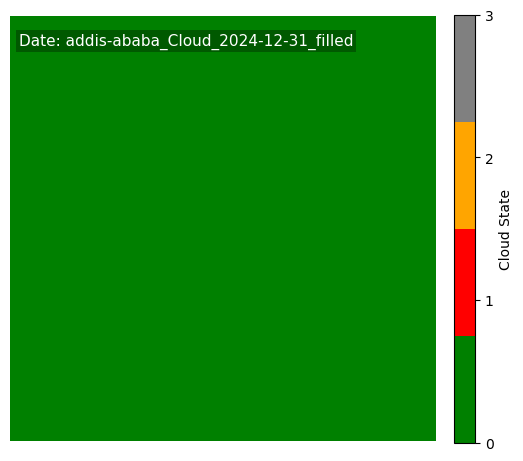

GIF saved to: /Users/ll/Documents/GitHub/air-pollution-mobility-research-project/data/animation-output/addis-ababa-cloud-animation.gif


In [ ]:
addis_cloud_tif_dir = DATA_PATH / 'addis-ababa-cloud-filled'  
tiff_2_gif_cloud(addis_cloud_tif_dir, output_path=DATA_PATH, output_name="addis-ababa-cloud-animation", fps = 8)

In [ ]:
addis_cloud_tif_dir = DATA_PATH / 'addis-ababa-cloud-filled'  

aggregate_cloud_data(
    data_tiff_path=addis_cloud_tif_dir, 
    mesh_path=addis_meshes_path, 
    layer_name=lyr_addis_name,
    feature_name="cloud_category"
)

Visualisation

The result of aggregation in shown below, taking 01/01/2023 as an example:

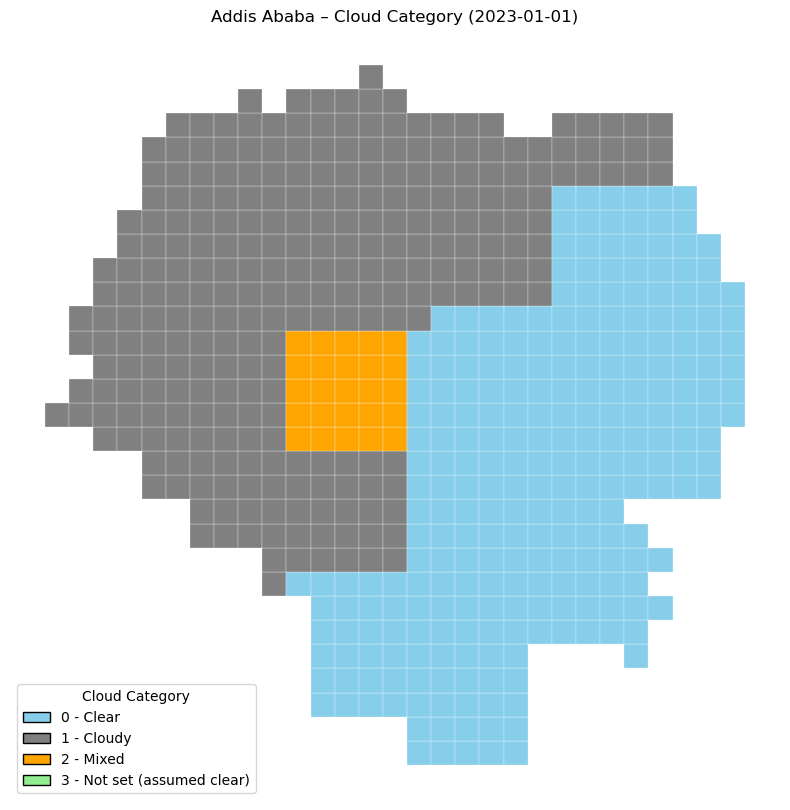

In [ ]:
addis_mesh_grid = DATA_PATH / "addis-cloud-data/addis-ababa-2023-01-01.gpkg"
plot_cloud_category(addis_mesh_grid, title="Addis Ababa – Cloud Category (2023-01-01)")

#### Iraq - Baghdad

Clip

In [ ]:
min_lon, max_lon = 43.7, 45.0
min_lat, max_lat = 32.7, 33.8

In [ ]:
baghdad_cloud_tiff = "../data/Cloud_Baghdad" 
clip_cloud_tiff_by_bbox('baghdad', baghdad_cloud_tiff, output_path,
                    min_lon, min_lat, max_lon, max_lat,)

Fill cloud missing data

In [ ]:
baghdad_cloud_clipped = DATA_PATH / "baghdad-cloud-clipped"

fill_cloud_missing_data(
    city = 'baghdad',
    data_tiff_path = baghdad_cloud_clipped,
    output_path = DATA_PATH,
)

Visualisation

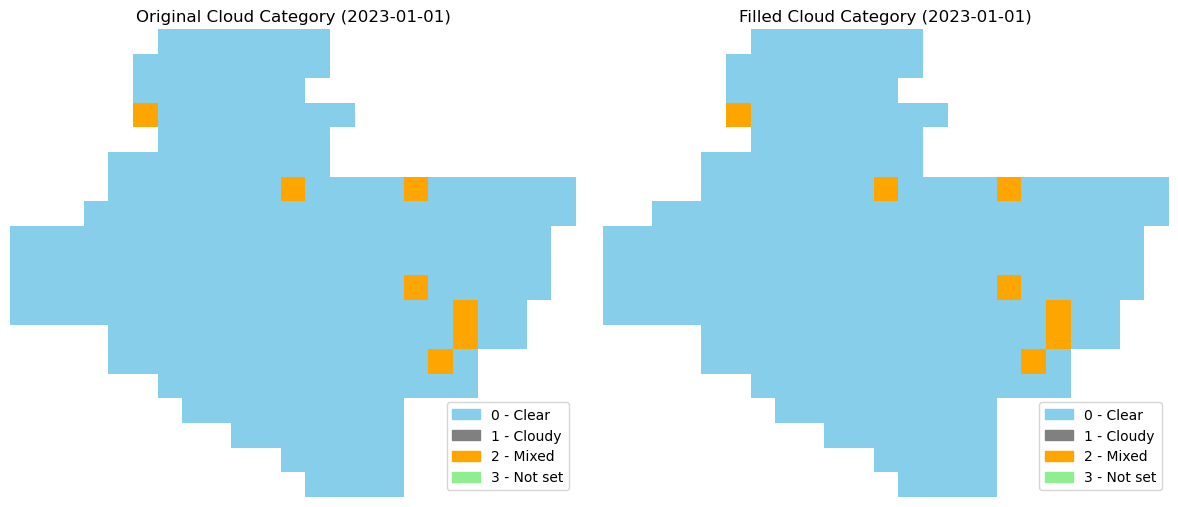

In [ ]:
import matplotlib.pyplot as plt
import rasterio

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# === Read original filled raster ===

with rasterio.open(DATA_PATH / 'baghdad-cloud-clipped/CloudState_Baghdad_20230101.tif') as src1:
    cloud_arr1 = src1.read(1)
    nodata = src1.nodata  # Get nodata value from the raster metadata
    plot_cloud_category_raster(
        arr=cloud_arr1,
        title="Original Cloud Category (2023-01-01)",
        ax=axes[0],
        nodata_value=nodata
    )

# === Read cropped raster ===
with rasterio.open(DATA_PATH / 'baghdad-cloud-filled/baghdad_cloud_2023-01-01_alltouched_crop.tif') as src2:
    cloud_arr2 = src2.read(1)
    nodata2 = src2.nodata
    plot_cloud_category_raster(
        arr=cloud_arr2,
        title="Filled Cloud Category (2023-01-01)",
        ax=axes[1],
        nodata_value=nodata2
    )

plt.tight_layout()
plt.show()


Animation

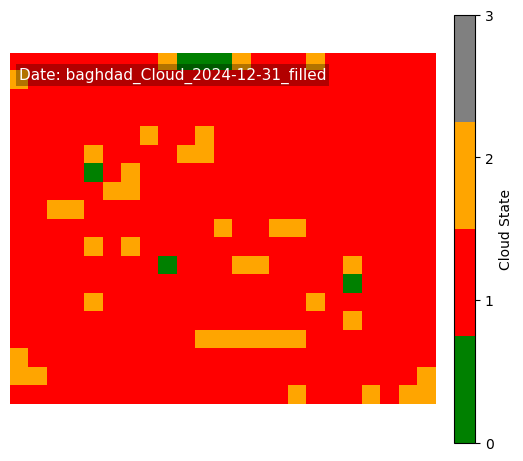

GIF saved to: /Users/ll/Documents/GitHub/air-pollution-mobility-research-project/data/animation-output/baghdad-cloud-animation.gif


In [ ]:
baghdad_cloud_tif_dir = DATA_PATH / 'baghdad-cloud-filled'  
tiff_2_gif_cloud(baghdad_cloud_tif_dir, output_path=DATA_PATH, output_name="baghdad-cloud-animation", fps = 8)

Aggregate

In [ ]:
# Aggregate Iraq - Baghdad
baghdad_cloud_tif_dir = DATA_PATH / "baghdad-cloud-filled"

aggregate_cloud_data(
    data_tiff_path=baghdad_cloud_tif_dir, 
    mesh_path=baghdad_meshes_path, 
    layer_name=lyr_baghdad_name,
    feature_name="cloud_category"
)

**Visualisation**

The result of aggregation in shown below, taking 2023-01-01 as an example:

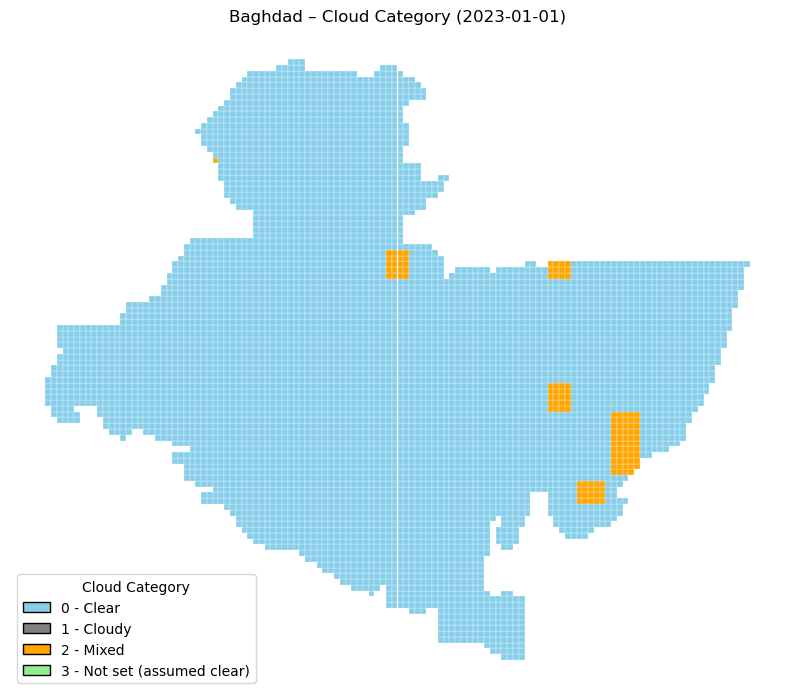

In [ ]:
baghdad_mesh_grid = DATA_PATH / "baghdad-cloud-data/baghdad-2023-01-01.gpkg"
plot_cloud_category(baghdad_mesh_grid,title="Baghdad – Cloud Category (2023-01-01)")

## 5 Land Surface Temperature

In [ ]:
import rasterio
from aggregation import*

output_path = DATA_PATH
addis_meshes_path = DATA_PATH / 'addis-mesh-data'
baghdad_meshes_path = DATA_PATH / 'baghdad-mesh-data'

mesh_addis = DATA_PATH / "mesh-grid" / "grid_addis_ababa.gpkg"
mesh_baghdad = DATA_PATH / "mesh-grid" / "grid_baghdad.gpkg"

lyr_addis_name = fiona.listlayers(mesh_addis)[0]         # control layer number = 1 
lyr_baghdad_name = fiona.listlayers(mesh_baghdad)[0]

#### Iraq - Baghdad

Clip

In [ ]:
min_lon, max_lon = 43.7, 45.0
min_lat, max_lat = 32.7, 33.8

baghdad_temp_tiff = DATA_PATH / "Surface-temperature-baghdad"
clip_tiff_temp_by_bbox('baghdad', baghdad_temp_tiff, output_path,
                      min_lon, min_lat, max_lon, max_lat,)

Fill

**Temperature gaps.**  
If the satellite skips a day, we treat it as a brief glitch in an otherwise smooth temperature curve. We take the value from the day before and the day after, draw a straight line between them, and assign the missing day the point on that line (a 48-hour centred linear interpolation). Because air temperature changes gradually, this keeps the natural rise-and-fall pattern intact without inventing any unrealistic spikes.


In [ ]:
baghdad_temp_clipped = DATA_PATH / "baghdad-temp-clipped"

fill_temp_missing_data(
    city = 'baghdad',
    data_tiff_path = baghdad_temp_clipped,
    output_path = DATA_PATH,
)

**Visualisation**

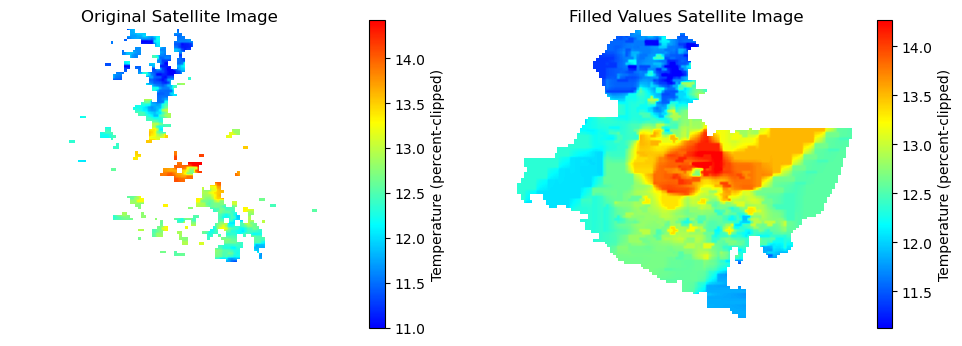

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# plot original image
src, band, profile, nodata_value = read_tiff(DATA_PATH / 'baghdad-temp-clipped/MODIS_LST_Day_2023_01_01.tif')
plot_raster_temp(band, percent_clip=0.5, ax=axes[0], title="Original Satellite Image")

# filled image
src, band_filled, profile, nodata_value = read_tiff(DATA_PATH / 'baghdad-temp-filled/baghdad_temp_2023-01-01_trimmed_to_baghdad.tif')
plot_raster_temp(band_filled, percent_clip=0.5, ax=axes[1], title="Filled Values Satellite Image")

plt.show()

Animation:

Before filling

Scanning percentiles: 100%|██████████| 731/731 [00:01<00:00, 420.88it/s]


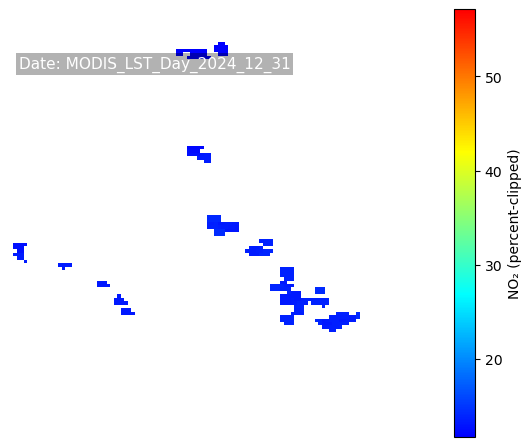

Animation saved to: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\animation-output\baghdad-temp-animation.gif


In [ ]:
# Use the existing pathlib.WindowsPath variable for the directory
baghdad_temp_tif_dir_clip = DATA_PATH / 'baghdad-temp-clipped'   
tiff_2_gif(baghdad_temp_tif_dir_clip, output_path=DATA_PATH, output_name="baghdad-temp-animation", fps=8)

After data filling

Aggregate

In [ ]:
# Aggregate Iraq - Baghdad
baghdad_temp_tif_dir = DATA_PATH / 'baghdad-temp-filled'  
aggregate_data(
    data_tiff_path=baghdad_temp_tif_dir, 
    mesh_path=baghdad_meshes_path, 
    layer_name=lyr_baghdad_name,
    feature_name="temp_mean"
    )

**Visualisation**

Show aggregated result in 2023-01-01 in Baghdad.

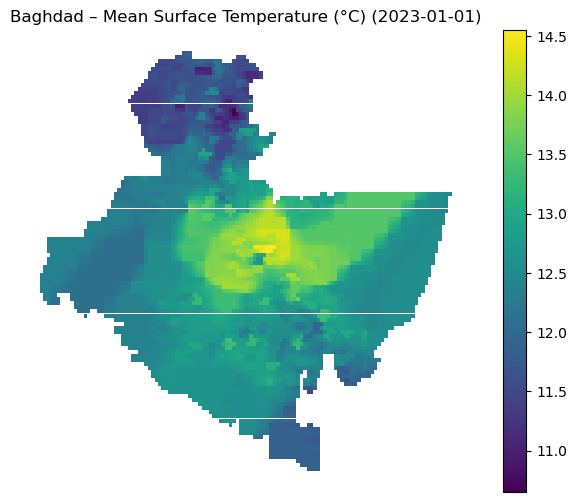

<Axes: title={'center': 'Baghdad – Mean Surface Temperature (°C) (2023-01-01)'}>

In [ ]:
# plot the aggregated data
gdf_bag = gpd.read_file(DATA_PATH / "baghdad-mesh-data/baghdad-2023-01-01.gpkg")
plot_mesh(
    mesh    = gdf_bag,
    feature = "temp_mean",
    title   = "Baghdad - Mean Surface Temperature (°C) (2023-01-01)",
    show_edges=False
)

## 6 Traffic Congestion Index (TCI)

#### Iraq - Baghdad

In [ ]:
from helpercollections import fill_tci_to_gpkg

baghdad_tci_path = DATA_PATH / 'baghdad-TCI'
gpkg_folder = DATA_PATH / 'baghdad-empty-mesh-data'
output_folder = DATA_PATH / 'baghdad-TCI-mesh-data'

fill_tci_to_gpkg(gpkg_folder, baghdad_tci_path, output_folder)

Visualisation

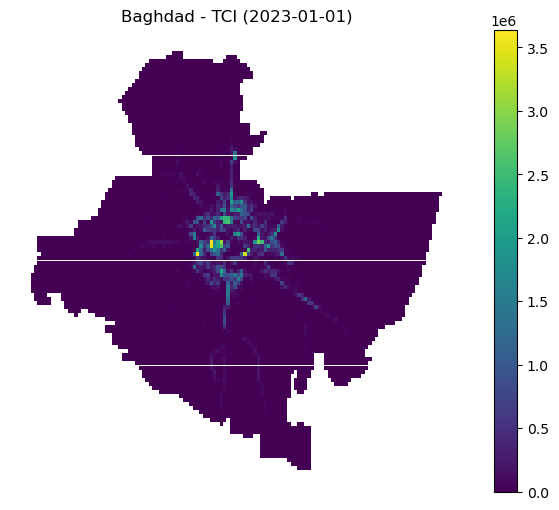

<Axes: title={'center': 'Baghdad - TCI (2023-01-01)'}>

In [10]:
baghdad_tci=DATA_PATH/'baghdad-mesh-processed-data/baghdad-2023-01-01.gpkg'
gdf_addis = gpd.read_file(baghdad_tci)


plot_mesh(
    mesh    = gdf_addis,
    feature = "TCI",
    title   = "Baghdad - TCI (2023-01-01)",
    show_edges=False
)